# From data to decisions


## EXERCISE: Model selection on test data

### Load and split data

Let's revisit the model selection. First, we need to load and split the iris data.

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Grid search against test data

We'll compare two approaches to model selection. The first looks at each parameter combination like grid search. However, it fits a model using the train split and compares scores on the test split.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

C_VALUES = [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7]
PENALTY_VALUES = ['l2']
SOLVER_VALUES = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

for C in C_VALUES:
    for penalty in PENALTY_VALUES:
        for solver in SOLVER_VALUES:
            logreg = LogisticRegression(C=C, penalty=penalty, solver=solver) #multi_class=multi_class)
            logreg.fit(X_train, Y_train)
            print('C:', C, 'penalty:', penalty, 'solver:', solver)
            print(classification_report(Y_test, logreg.predict(X_test)))

C: 1 penalty: l2 solver: newton-cg
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        17
          2       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        50

C: 1 penalty: l2 solver: lbfgs
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        17
          2       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        50

C: 1 penalty: l2 solver: liblinear
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.82      0.90        17
          2       0.85      1.00      0.92        17

avg / total       0.95      0.94      0.94        50

C: 1 penalty: l2 solver: sag
             precision    recall  f1-score   support

          0 

/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10000.0 penalty: l2 solver: lbfgs
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.89      1.00      0.94        17
          2       1.00      0.88      0.94        17

avg / total       0.96      0.96      0.96        50

C: 10000.0 penalty: l2 solver: liblinear
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.89      1.00      0.94        17
          2       1.00      0.88      0.94        17

avg / total       0.96      0.96      0.96        50

C: 10000.0 penalty: l2 solver: sag
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.93      0.82      0.87        17
          2       0.84      0.94      0.89        17

avg / total       0.92      0.92      0.92        50

C: 100000.0 penalty: l2 solver: newton-cg
             precision    recall  f1-scor

### Grid search with cross validation

Let's compare to grid search with `GridSearchCV` from `sklearn.grid_search`. This uses cross validation on the training data to choose parameters, without touching the test split.

In [3]:
from sklearn.grid_search import GridSearchCV

# Perform grid search
param_grid = [
    {'C': C_VALUES, 'penalty': PENALTY_VALUES, 'solver': SOLVER_VALUES}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in logreg.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', logreg.best_params_)

print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/carolchen/anaconda/

Grid search mean and stdev:

0.920 (+/-0.027) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920 (+/-0.027) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.930 (+/-0.115) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.930 (+/-0.076) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.960 (+/-0.029) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960 (+/-0.029) for {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.950 (+/-0.076) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.960 (+/-0.076) for {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.960 (+/-0.029) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960 (+/-0.029) for {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.960 (+/-0.029) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.950 (+/-0.076) for {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.970 (+/-0.001) for {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.970 (+/-0.001) for {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.970 (

### TODO Comparing parameter selection schemes

The first approach gives test accuracy of 0.98 with, e.g., `{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}`. The second approach gives test accuracy of 0.96 with `{'C': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}`.

- Which parameters would you choose to deploy? Why?

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Ensembling classifiers

### Load and split data

scikit-learn provides a `train_test_split` function (in `sklearn.cross_validation`). However, there is no function to do a three-way split into training, development and held-out test data.

Let's create a three-way 50/25/25 train/dev/test split by using `train_test_split` two times.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
X, y = digits.data, digits.target
X_td, X_test, y_td, y_test = train_test_split(digits.data, digits.target, test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results

### Plot error vs complexity for decision tree

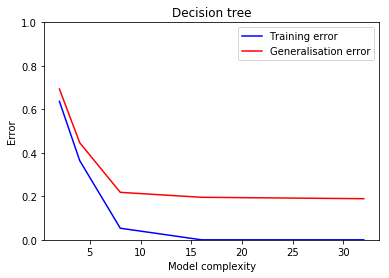

In [5]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import random

NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

### TODO Assessing decision tree fit

- Does training or generalisation error level out first? Why?
- What is the best value of max_depth based on this plot?
- Why doesn't generalisation error increase on the right

In [ ]:
# 1 - Generalisation error levels out first.
#     This suggests that higher values of max_depth may lead to overfitting.

# 2 - max_depth=8. This gives the best generalisation error with lower 
#     model complexity and less risk of overfitting.

# 3 - The algorithm has other mechanisms to prevent overfitting.
#     And overfitting does seem to hurt generalisation too much on this data.
#     Nevertheless, decision trees can overfit so use with caution.

### Plot error vs complexity for random forest

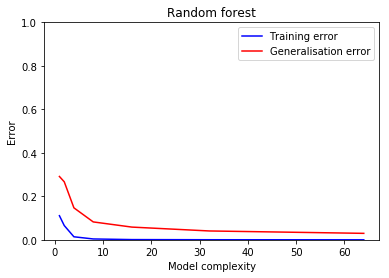

In [7]:
from sklearn.ensemble import RandomForestClassifier

complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

### Plot error vs number of training samples

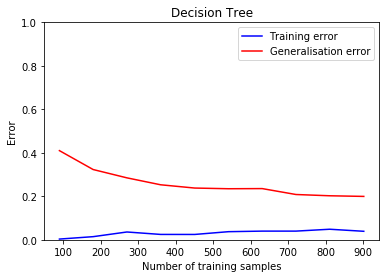

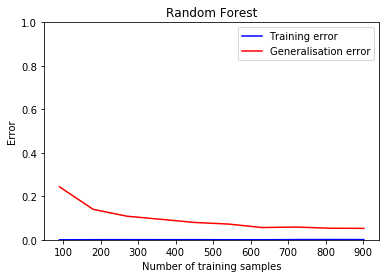

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Note that we're passing dev data for estimating generalisation error here, not test data
dt = DecisionTreeClassifier(max_depth=8)
plot_error_curves(dt, X_train, y_train, X_dev, y_dev, title='Decision Tree')
rf = RandomForestClassifier(max_depth=8, n_estimators=16)
plot_error_curves(rf, X_train, y_train, X_dev, y_dev, title='Random Forest')

### TODO Comparing fit and data needed

- Which classifier would you use?
- Would it be useful to collect more training data?
- The decision tree has a larger spread between training and generalisation error. Why is this?
- Note we haven't yet used test data. When is it OK to use the held-out test data from our train/dev/test split?

In [ ]:
# 1 - Random forest is clearly better (error rates under 10% vs 20% for decision tree)

# 2 - Yes, almost always. However, it looks like both classifiers are close to their asymptotes.
#     So the benefit might not be worth the cost.
#     The decision tree would benefit more from additional data.

# 3 - The decision tree suffers more from overfitting.
#     The random forest on this particular data has 0 training error.
#     This is a bit of a surprise as random forests tend to increas bias.
#     With high bias, we would expect underfitting which tends to be 
#     characterised by both high training and high generalisation error.
#     However, random forests generally also reduce variance enough
#     to cancel out any increase in bias.
#     Here we end up with a nice generalisation error plot that seems
#     to be close to its asymptote and not too different from the
#     training error.

# 4 - As little as possible. Ideally only once for our final 
#     generalisation error/accuracy calculation. 

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Analysis and deciding to deploy

Error analysis and subtractive feature analysis for above classifier

### Compare confusion matrices

DecisionTreeClassifier confusion matrix:
[[35  0  2  0  0  0  0  0  0  0]
 [ 0 23  1  0  1  1  3  0 12  1]
 [ 0  0 31  0  0  0  0  1 13  0]
 [ 0  0  1 30  0  1  0  1  4  5]
 [ 0  0  0  1 37  1  4  4  3  1]
 [ 0  2  0  0  0 38  2  0  0  0]
 [ 0  0  0  0  1  0 40  0  0  0]
 [ 0  0  1  0  4  0  0 37  3  1]
 [ 0  0  2  2  0  0  0  0 34  3]
 [ 0  0  1  5  1  1  0  1  5 44]]

RandomForestClassifier confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  1]
 [ 0  0 44  0  0  0  1  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 39  2  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  2  0  0  0  0  0  1 37  1]
 [ 0  1  0  0  0  0  0  1  3 53]]


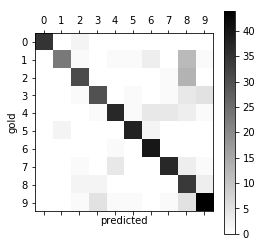

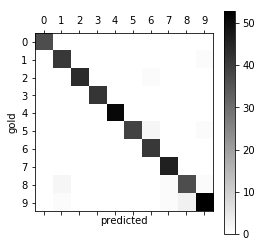

In [9]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

dt.fit(X_train, y_train)
print('DecisionTreeClassifier confusion matrix:')
dt_conf = confusion_matrix(y_dev, dt.predict(X_dev))
print(dt_conf)

rf.fit(X_train, y_train)
print('\nRandomForestClassifier confusion matrix:')
rf_conf = confusion_matrix(y_dev, rf.predict(X_dev))
print(rf_conf)

_ = plt.matshow(dt_conf, cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('gold')
_ = plt.xlabel('predicted')
_ = plt.yticks(range(10), digits.target_names)
_ = plt.xticks(range(10), digits.target_names)

_ = plt.matshow(rf_conf, cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('gold')
_ = plt.xlabel('predicted')
_ = plt.yticks(range(10), digits.target_names)
_ = plt.xticks(range(10), digits.target_names)

### TODO Common confusions

- What are the three most common confusions for decision tree?
- What kinds of features might we use to address this?

In [10]:
# 1 - Classifying 1s and 2s as 8. Classifying 3s as 9.

# 2 - Perhaps structured features that represent the amount of horizontal
#     whitespace at the top of an image. We'd expect 1s to have less at the top.
#     We'd expect 2s to have less on average than 8s.
#     We'd expect 9s to have less at the bottom than 3s.

### TODO Results review

- Discuss which solution you would deploy for the following scenario. Or whether you need more information.

#### Scenario 2

_Problem_: NER engine to be deployed on mobile phones to identify mentions of address book contacts and validate “to” list completeness before an email is sent; Must have at least 90% precision

- Solution 1: Uses a deep neural network; Achieves 95% precision at 80% recall; It runs in 30s and uses 4GB memory; It does well on frequent and infrequent contacts
- Solution 2: Uses address book lookup; Achieves 90% precision at 75% recall; It runs in 0.01s and uses 100MB memory; It does OK on frequent and infrequent contacts
- Solution 3: Uses address book lookup preferring frequent contacts; Achieves 90% precision at 75% recall; It runs in 0.01s and uses 100MB memory; It does better on frequent contacts

In [11]:
# 1 - I would choose solution 3. The accuracy is worse but...
#     It meets the time and space requirements.
#     It is less likely to make obvious errors on frequently used contacts.

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*